### CONFUSION MATRIX

========================METHOD 1==================================
(56000, 784)
(14000, 784)
(56000,)
(14000,)
========================METHOD 2==================================
(60000, 784)
(10000, 784)
(60000,)
(10000,)
================Training a Binary Classifier======================

[False False False ...  True False False]
[False False False ... False False False]

=============Training the SGDClassifier===========================


================================Prediction=======================================

======================Method 1 to do cross validation=========================
0.9880
0.9881
0.9899

=======================Method 2 to do the Cross Validation=======================
=============uisng Sklearn cross_val_score Method================================


array([0.9787 , 0.97725, 0.97985])

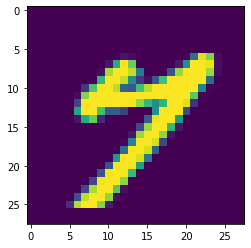

In [29]:
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## function to visualize the digit
def visualize_the_digit(n):
    """ The digit n is the any number between 0 and 70000.
    
    param n :- n is the number that represents from the minst["data"]
    return the image of the number represented by the number given in the param.
    """
    plt.imshow(X[n].reshape(28,28))
    return
## function to plot the precision recall vs threshold curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])   

## importing the data
mnist = fetch_openml(name = "mnist_784")
X = mnist["data"]
y = mnist["target"]
y = y.astype("float")

## split the dataset into training and test set.
## method 1
print("========================METHOD 1==================================")
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print("========================METHOD 2==================================")
## method 2
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## shuffling the data
num_split = 60000
shuffle_index = np.random.permutation(num_split)  ## this will keep shuffling everytime we run the code.
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

print("================Training a Binary Classifier======================")
print()
## Binary Classifier to classify the number 0 and number non-zero.
## frist convert the target to 0 and non-zero.
y_train_0 = (y_train == 0)
print(y_train_0)  ## when the target data is 0 for training data
y_test_0 = (y_test == 0)
print(y_test_0)   ## when the target data is 0 for testing data
print()
print("=============Training the SGDClassifier===========================")
print()
## they are basically linear classifier.
## SVM, Logistic Regression with SGD Training.
## SGD - Stochastic Gradient Descent.

## training.
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)
classifier.fit(X_train, y_train_0)

print()
print("================================Prediction=======================================")
print()
## visualize the 1000 th image
visualize_the_digit(1000)
## checking the prediction using the classifier.
classifier.predict(X[1000].reshape(1,-1))

## checking the result using 1001
## visualize the 1001 th image
visualize_the_digit(1001)
## checking the prediction using the classifier.
classifier.predict(X[1001].reshape(1,-1))


print("======================Method 1 to do cross validation=========================")

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

## make the split of 3 folds.
skfolds = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_0):  ## 3 iterations, since we have 3 folds.
    ## clone the clfs
    clone_clf = clone(clf)
    ## creating the folds
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))
    
print()
print("=======================Method 2 to do the Cross Validation=======================")
print("=============uisng Sklearn cross_val_score Method================================")
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv = 3, scoring = "accuracy")

Danger of Blindly Applying the Evaluator as a Perfomance Measure checking against a dumb classifier.

+ Here stat says that 90% of the images are not 0.
+ So any time you guess the image is not zero, the chance of guess to be correct is 90%.
+ This is important when dealing with skewed datasets.
+ We cannot take one perfomance measure and generalizes with it.

SO HERE WE ARE USING THE CONFUSION MATRIX AS WELL

In [4]:
(1 - sum(y_train_0) / len(y_train_0)) * 100

90.12833333333333

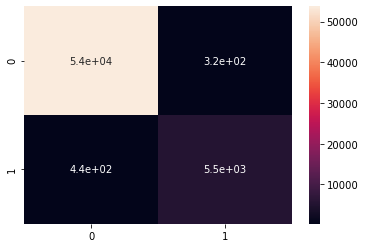

In [7]:
## applying the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv = 3)
## using confusion matrix
matrix = confusion_matrix(y_train_0, y_train_pred)
## plotting the confusion matrix
import seaborn as sns
sns.heatmap(matrix, annot = True)

In [8]:
matrix

array([[53757,   320],
       [  437,  5486]], dtype=int64)

+ True Negatives - 53757
+ True Positives - 5486
+ False Positives - 320
+ False Negatives - 437

In [10]:
 ## put the confusion matrix to the dataframe.
pd.DataFrame(matrix,
            columns = pd.MultiIndex.from_product([["Prediction"],["Negative", "Positive"]]),
            index = pd.MultiIndex.from_product([["Actual"],["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      53757      320
       Positive        437     5486

### PRECISION

+ Measures the Accuracy of the Positive Predictions.
+ Also called the Precision of the Classifier.

$$ Precision = (True Positives) / (True Positives + False Positives) $$


Here 94% is the Precision of the Classifier

In [11]:
from sklearn.metrics import precision_score
precision_score(y_train_0, y_train_pred)

0.9448846021357217

### RECALL

+ Precision is typically used with Recall.
+ (Sensitivity or True Positive Rate)
+ The ratio of Positive Instances that are correctly detected by the Classifier.

$$ Recall = (True Positives) / (True Positives + False Negatives) $$

In [12]:
from sklearn.metrics import recall_score
recall_score(y_train_pred, y_train_0)

0.9448846021357217

### F1-SCORE

+ f1 score is the Harmonic Mean of Precision and Recall.
+ Regular Mean gives equal weight to all values.
+ Harmonic Mean gives more weight to low values.
+ P = Precision, and R = Recall

$$ f1-score = 2 P R / P + R $$

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9354591184244182

### PRECISION RECALL TRADEOFF

Central Arrow :-

+ Suppose the Decision threshold is Positioned at Central Arrow.
+ We get 4 True Positives.
+ We get 1 False Positives.
+ Then `Precision = 4/5 = 80% and Recall = 4/6 = 67%`

Right Arrow :-

+ Suppose the Decision Threshold is Positioned at Right Arrow.
+ We get 3 True Positives.
+ 0 False Positives.
+ `Precision = 3/3 = 100% and Recall = 3/6 = 50%`

Left Arrow :-

+ We get 6 True Positives.
+ 2 False Positives.
+ `Precision = 6/8 = 75% and Recall = 6/6 = 100%`

So there is a Trade off between Precision and Recall.

+ As Precision keep on increasing, the Recall will Decrease.
+ As Recall keep on increasing, the Precision will Decreses.

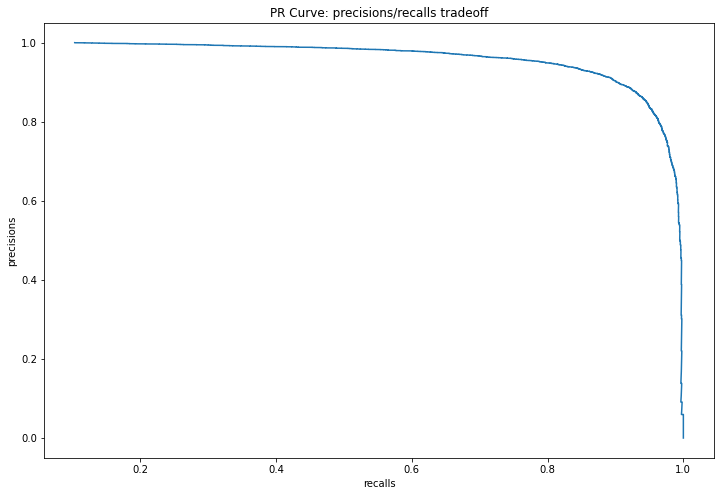

In [32]:
## precsion vs recall curve
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

0.0
The Decision Score for y[1000] [19864.68009464]
7.0
The Decision Score for y[1001] [-45097.23205551]
[False]
[False]
================Calculating the y_score for all X_train values====================



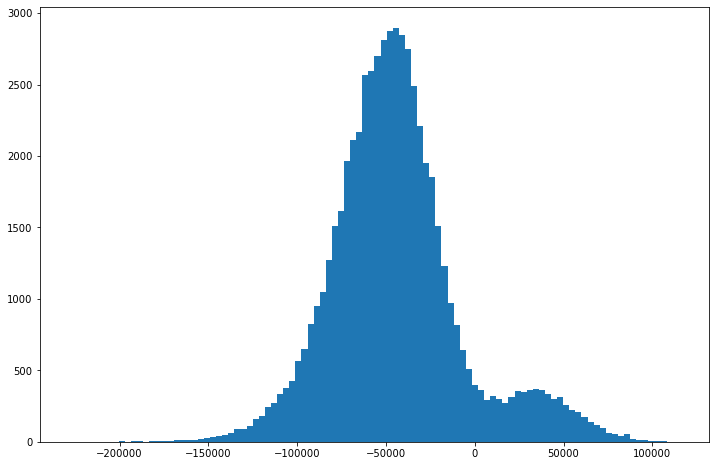

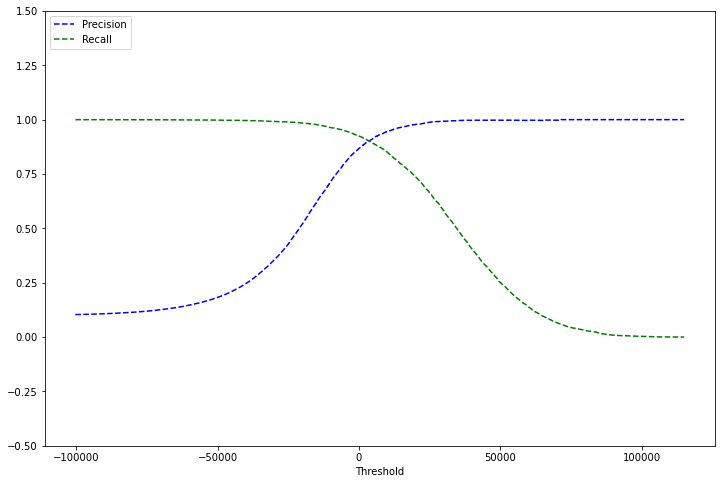

In [33]:
## code.
np.random.seed(0)
## define the classifier
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)
## check for y[1000]
print(y[1000])
## find the y score for that y[1000] using the decision threshold.
y_score = clf.decision_function(X[1000].reshape(1,-1))
print("The Decision Score for y[1000]", y_score)

## checking for y[1001]
## check for y[1001]
print(y[1001])
## find the y score for that y[1001] using the decision threshold.
y_score = clf.decision_function(X[1001].reshape(1,-1))
print("The Decision Score for y[1001]", y_score)

## now set the threshold to 0
threshold = 0
y_some_digit_pred = (y_score > threshold)
print(y_some_digit_pred)
## now set the threshold to 40000
threshold = 40000
y_some_digit_pred = (y_score > threshold)
print(y_some_digit_pred)

print("================Calculating the y_score for all X_train values====================")
print()

y_scores = cross_val_predict(clf, X_train, y_train_0, cv = 3, method = "decision_function")

## plot the curve the decision scores.
plt.figure(figsize=(12,8));
plt.hist(y_scores, bins=100);

## with the decision scores we can compute the p and r of all posible threshold using precision_recall_curve()
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

## plot the precision recall curve
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

+ With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.
+ Some tasks may call for higher precision (accuracy of positive predictions). 
+ Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

+ Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). 
+ Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

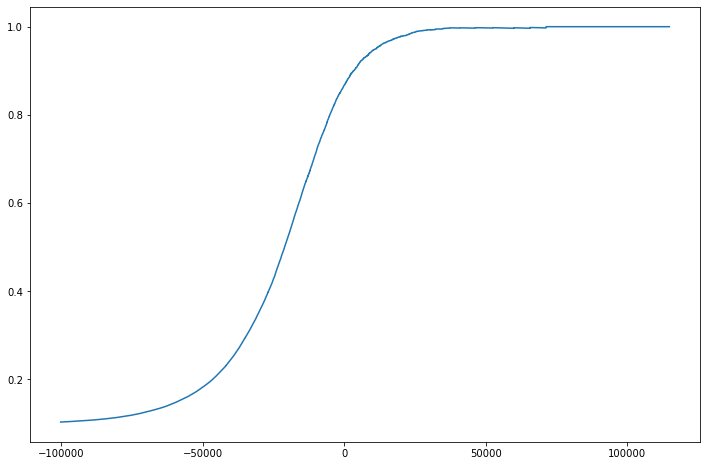

In [37]:
## plot of thresholds vs precision.
plt.figure(figsize = (12,8))
plt.plot(thresholds, precisions[1:]);

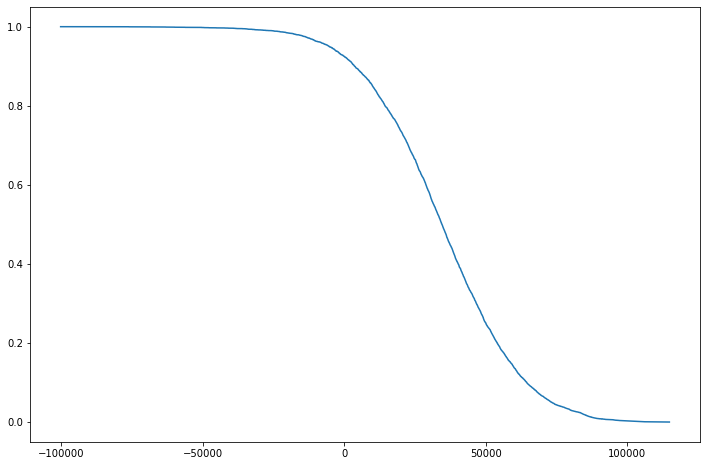

In [38]:
## plot of thresholds vs recall.
plt.figure(figsize = (12,8))
plt.plot(thresholds, recalls[1:]);

In [48]:
## Setting High Precsions
print("==================Setting the High Precsions=====================")
print()
print(len(precisions))
print(len(thresholds))
## define index for precsion less than 0.9
idx = len(precisions[precisions < 0.9])
print("Threshold Corresponding to the precsion which is less than 0.9 :--",thresholds[idx])
## predcit the whether the score is true or false at that point.
y_train_pred_90 = (y_scores > thresholds[idx])
print("The Precsion at that point :--", precision_score(y_train_0, y_train_pred_90))
print("The Recall at that point :--", recall_score(y_train_0, y_train_pred_90))

print("===================Setting the Precsion Even High======================")
print()
##Let's aim for 99% precisions.
idx = len(precisions[precisions < 0.99])  ## 99%
print("Threshold Corresponding to the precsion which is less than 0.99 :--",thresholds[idx])
y_train_pred_99 = (y_scores > thresholds[idx])
print("The Precsion at that point :--", precision_score(y_train_0, y_train_pred_99))
print("The Recall at that point :--", recall_score(y_train_0, y_train_pred_99))

print("===================Setting High Recall======================")
print()
## High Recall Score. Recall score > 0.9
idx = len(recalls[recalls > 0.9]) ## 90% recalll
print("Threshold Corresponding to the Recall which is less than 0.9 :--",thresholds[idx])
y_train_pred_90 = (y_scores > thresholds[idx]) ## 90% recall
print("The Precsion at that point :--", precision_score(y_train_0, y_train_pred_90))
print("The Recall at that point :--", recall_score(y_train_0, y_train_pred_90))

==================Setting the High Precsions=====================

57279
57278
Threshold Corresponding to the precsion which is less than 0.9 :-- 3312.088856023864
The Precsion at that point :-- 0.9002019522046449
The Recall at that point :-- 0.9030896505149417
===================Setting the Precsion Even High======================

Threshold Corresponding to the precsion which is less than 0.99 :-- 26594.780577290163
The Precsion at that point :-- 0.99
The Recall at that point :-- 0.6351511058585176
===================Setting High Recall======================

Threshold Corresponding to the Recall which is less than 0.9 :-- 3639.4456886948205
The Precsion at that point :-- 0.9021665538253216
The Recall at that point :-- 0.8998818166469694


### ROC CURVE

+ ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`
+ The `false positive rate (FPR)` is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`
+ The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`

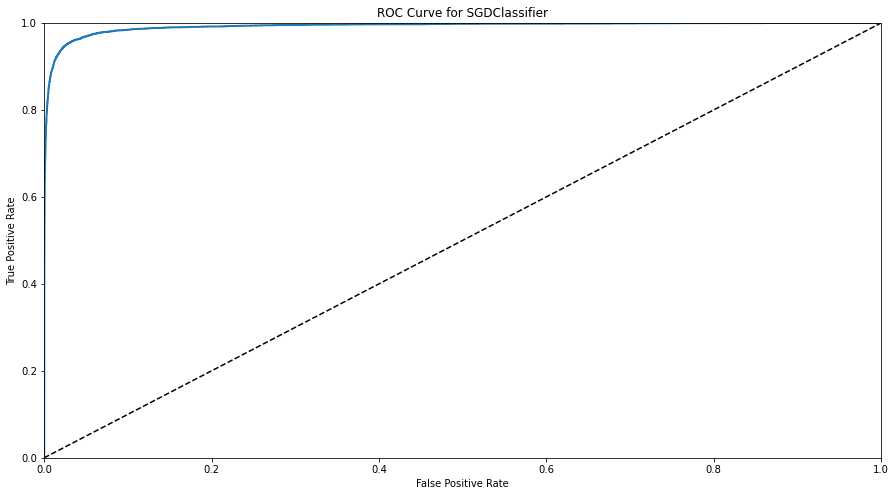

0.9920860653575401

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
## compute the tpr, fpr and thresholds using y_train_0 and y_scores
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

## function to plot roc curve.
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for SGDClassifier')
    
## plotting the fpr vs tpr
plt.figure(figsize=(15,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

## using roc_auc_score calculating the score.
roc_auc_score(y_train_0, y_scores)

For SGDClassifier, the Area Under Curve Score is 99.2%

+ Use PR (Precision-Recall) curve whenever the positive class is rare or when you care more about the `false positives` than the `false negatives`
+ Use ROC curve whenever the negative class is rare or when you care more about the `false negatives` than the `false positives`
+ In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

### TRAINING THE RANDOMFOREST CLASSIFIER

[[0.95 0.05]
 [1.   0.  ]
 [0.98 0.02]
 ...
 [0.15 0.85]
 [1.   0.  ]
 [0.99 0.01]]
[0.05 0.   0.02 ... 0.85 0.   0.01]


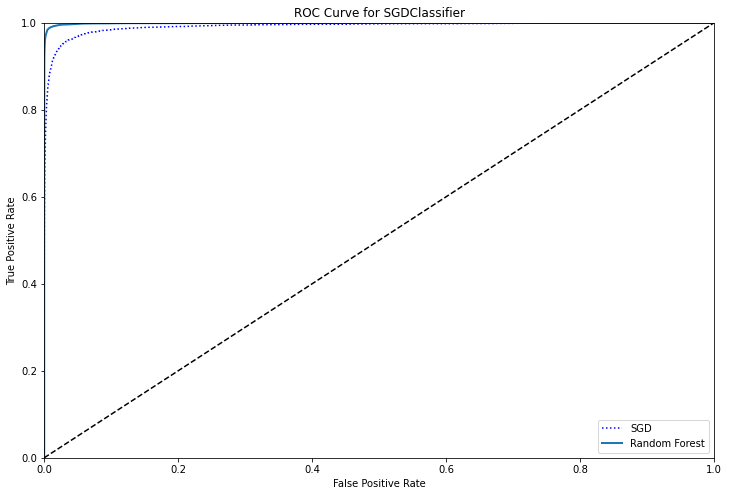

0.9993474031880761

In [62]:
from sklearn.ensemble import RandomForestClassifier
## defining the randomforestclassifier
forest_clf = RandomForestClassifier(random_state=0, n_estimators=100)
## using the cross val predict method, calculate the y_probas fro the randomforestclassifier.
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0,cv=3, method='predict_proba')
print(y_probas_forest)
y_scores_forest = y_probas_forest[:, 1]
print(y_scores_forest)
## fpr, tpr, threshold forest values
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)
##plotting the fpr vs tpr plot
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();
roc_auc_score(y_train_0, y_scores_forest)

In [63]:
## fit the random forest classifier
forest_clf.fit(X_train, y_train_0)
## predict the random forest classifier
y_train_rf = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
## precision score
print("The Precision Score of Random FOrest Classifier :--", precision_score(y_train_0, y_train_rf))
print("The Recall Score of Random Forest CLassifier :--", recall_score(y_train_0, y_train_rf))
print("The Confusion Matrix :--", confusion_matrix(y_train_0, y_train_rf))

The Precision Score of Random FOrest Classifier :-- 0.9929078014184397
The Recall Score of Random Forest CLassifier :-- 0.9454668242444707
The Confusion Matrix :-- [[54037    40]
 [  323  5600]]


The Scores of Random Forest Classifier

+ AUC :- 99.93%
+ Precision :-- 99.29%
+ Recall :-- 94.54%
+ And in Confusion Matrix we have more Truw Positives and True Negatives than Earlier SGDClassifier.
+ Random Forest Classif